## Load df

In [2]:
import pandas as pd
import os
import numpy as np

In [3]:
DATASET_DIR = "music_audio_benchmark"

In [4]:
project_dir = os.path.relpath(os.path.join(os.getcwd(), os.pardir))
features_dir = os.path.join(project_dir, "features")

dataset_dir = os.path.join(features_dir, DATASET_DIR)

csv_file_name = "features.csv"
csv_file_path = os.path.join(dataset_dir, csv_file_name)

In [5]:
print("=== ORIGINAL DF ===")
df = pd.read_csv(csv_file_path)
display(df.head())

feature_columns =[
        'name', 'duration', 'tempo', 
        'chroma_key_1', 'chroma_key_2', 'chroma_key_3', 
        'mean_root_square_mean', 'mean_zero_crossing_rate', 
        'mean_spectral_centroid', 'mean_spectral_bandwith', 'mean_spectral_roll_off', 
        'label'
    ]

print("=== FEATURES ===")
df_features = df[feature_columns].copy()
display(df_features.head())

path_columns = [
    'name', 'path', 
    'path_spectogram_img', 'path_spectogram_arr', 
    'path_mel_spectogram_img', 'path_mel_spectogram_arr', 
    'path_chromagram_img', 'path_chromagram_arr', 
    'path_mfccs_img', 'path_mfccs_arr', 'path_mfccs_without_0_img', 'path_mfccs_without_0_arr', 
    'label'
]

print("=== PATHS ===")
df_paths = df[path_columns].copy()
display(df_paths.head())

=== ORIGINAL DF ===


,name,duration,tempo,chroma_key_1,chroma_key_2,chroma_key_3,mean_root_square_mean,mean_zero_crossing_rate,mean_spectral_centroid,mean_spectral_bandwith,...,path_spectogram_arr,path_mel_spectogram_img,path_mel_spectogram_arr,path_chromagram_img,path_chromagram_arr,path_mfccs_img,path_mfccs_arr,path_mfccs_without_0_img,path_mfccs_without_0_arr,label
0,50_Minutes-Colours,10.057,76.000,B,C,G,0.190,0.022,1655.830,2608.513,...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
1,50_Minutes-Nightwalk,10.057,123.047,F,D,A,0.118,0.017,866.198,1545.713,...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
2,50_Minutes-The_Great_Wall,10.057,132.512,C,B,E,0.203,0.024,1402.899,2211.316,...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
3,Abigail_Lapell-Dress_Rehearsal,10.057,143.555,G,F,F#,0.123,0.045,2218.057,2839.679,...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
4,Albino_Catfish-Ice_Cream,10.057,132.512,C#,G#,A,0.153,0.074,2667.951,2712.802,...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative


=== FEATURES ===


,name,duration,tempo,chroma_key_1,chroma_key_2,chroma_key_3,mean_root_square_mean,mean_zero_crossing_rate,mean_spectral_centroid,mean_spectral_bandwith,mean_spectral_roll_off,label
0,50_Minutes-Colours,10.057,76.000,B,C,G,0.190,0.022,1655.830,2608.513,3622.496,alternative
1,50_Minutes-Nightwalk,10.057,123.047,F,D,A,0.118,0.017,866.198,1545.713,1512.838,alternative
2,50_Minutes-The_Great_Wall,10.057,132.512,C,B,E,0.203,0.024,1402.899,2211.316,2953.923,alternative
3,Abigail_Lapell-Dress_Rehearsal,10.057,143.555,G,F,F#,0.123,0.045,2218.057,2839.679,4639.921,alternative
4,Albino_Catfish-Ice_Cream,10.057,132.512,C#,G#,A,0.153,0.074,2667.951,2712.802,5195.016,alternative


=== PATHS ===


,name,path,path_spectogram_img,path_spectogram_arr,path_mel_spectogram_img,path_mel_spectogram_arr,path_chromagram_img,path_chromagram_arr,path_mfccs_img,path_mfccs_arr,path_mfccs_without_0_img,path_mfccs_without_0_arr,label
0,50_Minutes-Colours,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
1,50_Minutes-Nightwalk,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
2,50_Minutes-The_Great_Wall,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
3,Abigail_Lapell-Dress_Rehearsal,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
4,Albino_Catfish-Ice_Cream,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative


In [9]:
NUMBER_UNIQUE_LABELS = df['label'].nunique()

In [10]:
path_arr_columns = [
    'path_spectogram_arr',
    'path_mel_spectogram_arr',
    'path_chromagram_arr',
    'path_mfccs_arr'
]


def load_numpy_array(path):
    return np.load(path)


def calculate_mean(path):
    arr = load_numpy_array(path)
    return np.mean(arr)


def calculate_mean_across_column(path):
    arr = load_numpy_array(path)
    return np.mean(arr, axis=0)


def calculate_mean_across_row(path):
    arr = load_numpy_array(path)
    return np.mean(arr, axis=1)

In [11]:
def get_mean_df():
    mean_df = pd.DataFrame()

    for column in path_arr_columns:
        mean_column_name = column.replace('path', 'mean')
        mean_column_name = mean_column_name.replace('_arr', '')
        mean_df[mean_column_name] = df_paths[column].apply(
            lambda path: calculate_mean(path)
        )

#     print("=== MEAN PATHS ===")
#     print(mean_df)
    return mean_df

def get_mean_by_column_df(column_name):    
    means_series = df_paths[column_name].apply(calculate_mean_across_column) 
#     means_series = df_paths[column_name].apply(calculate_mean_across_row) 
    mean_df = pd.DataFrame(means_series.tolist(), index=df_paths.index)
    mean_df.columns = [f'{column_name}_{index}' for index in mean_df.columns]
    return mean_df

In [42]:
# mean_df = get_mean_df()
long_mean_df = get_mean_by_column_df('path_mel_spectogram_arr')

# TODO: fill with 0?
long_mean_df.fillna(0, inplace=True)
long_mean_df.head()

,path_mel_spectogram_arr_0,path_mel_spectogram_arr_1,path_mel_spectogram_arr_2,path_mel_spectogram_arr_3,path_mel_spectogram_arr_4,path_mel_spectogram_arr_5,path_mel_spectogram_arr_6,path_mel_spectogram_arr_7,path_mel_spectogram_arr_8,path_mel_spectogram_arr_9,...,path_mel_spectogram_arr_424,path_mel_spectogram_arr_425,path_mel_spectogram_arr_426,path_mel_spectogram_arr_427,path_mel_spectogram_arr_428,path_mel_spectogram_arr_429,path_mel_spectogram_arr_430,path_mel_spectogram_arr_431,path_mel_spectogram_arr_432,path_mel_spectogram_arr_433
0,-80.000000,-58.622623,-55.971249,-56.814728,-56.572838,-57.313877,-57.252464,-58.478729,-58.206059,-58.708565,...,-49.722870,-49.903622,-49.406555,-49.059643,-49.417656,-49.472008,-49.185013,-49.867725,-53.495724,-80.0
1,-80.000000,-49.033581,-45.305649,-39.605968,-40.284504,-42.323231,-43.412876,-43.950497,-44.576118,-45.068649,...,-54.358360,-54.903366,-55.002045,-54.824512,-54.897877,-53.898502,-54.109035,-53.866867,-52.710823,-80.0
2,-79.075775,-50.666058,-52.934532,-52.936989,-52.841736,-52.806599,-49.948586,-49.154644,-47.969994,-43.339783,...,-39.967262,-41.612160,-44.097435,-45.221752,-47.121937,-48.680523,-49.572319,-49.945599,-53.328053,-80.0
3,-80.000000,-55.776958,-56.294952,-55.668358,-56.900764,-56.823250,-58.080875,-57.696209,-57.088264,-57.515820,...,-55.145695,-56.679897,-56.679611,-47.536484,-40.528214,-39.015118,-41.704365,-43.675003,-46.638649,-80.0
4,-80.000000,-62.633224,-63.022381,-63.804501,-63.268768,-63.897655,-58.957859,-49.939793,-44.009621,-49.508465,...,-50.934608,-54.636555,-55.825932,-56.651367,-57.662758,-58.135773,-59.456707,-57.820736,-58.771523,-80.0


In [43]:
def show_df_summary(df):
    # Info
    print("\nDataFrame information:")
    print(df.info())
    print()
    
    # Null value
    print("Null values per column:")
    print(df.isnull().sum())
    print()

    # Shape
    print("\nDataFrame dimensions (rows, columns):")
    print(df.shape)
    print()

    # Column names
    print("\nColumn names:")
    print(df.columns)
    print()

    # Unique values
    print("\nNumber of unique values in each column:")
    print(df.nunique())
    print()

    # Descriptive statistics for numeric columns
    print("\nDescriptive statistics for numeric columns:")
    print(df.describe())
    print()

    # Frequency of unique values in each column
    print("\nFrequency of unique values in each column:")
    for column in df.columns:
        if df[column].dtype == 'object':
            print(f"\n{column}:")
            print(df[column].value_counts())

In [44]:
# show_df_summary(df)

## Prepare data for clustering

In [45]:
from sklearn.preprocessing import MinMaxScaler
import re

In [46]:
def get_features_df(df, df_features):
    df = df_features.drop(columns=['name', 'label', 'mean_spectral_centroid', 'mean_spectral_roll_off'])
    
    unique_chroma_key_values = df['chroma_key'].unique()
    mapping_dict_chroma = {value: index for index, value in enumerate(unique_chroma_key_values)}
    df['chroma_key'] = df['chroma_key'].map(mapping_dict_chroma)

    return df


def concat_df(df, df_to_concat):
    df = pd.concat([df, df_to_concat], axis=1)
    return df


def normalize_features(df):
    columns_to_normalize = []

    feature_columns = get_feature_columns()
    if all(col in df for col in feature_columns):
        columns_to_normalize += feature_columns
        
    mean_columns = get_mean_columns()
    if all(col in df for col in mean_columns):
        columns_to_normalize += mean_columns

    columns_to_normalize += get_long_mean_columns(df)
    
    scaler = MinMaxScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    
    return df


def normalize_all_features(df):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    df = pd.DataFrame(scaled_data, columns=df.columns)
    return df


def get_feature_columns():
    return ['duration', 'tempo', 'mean_root_square_mean', 'mean_zero_crossing_rate', 'mean_spectral_bandwith']


def get_mean_columns():
    return ['mean_spectogram', 'mean_mel_spectogram', 'mean_chromagram', 'mean_mfccs']


def get_long_mean_columns(df):
    path_pattern = re.compile(r'^path_.*_arr_.*$') # path_*_arr_
    return [col for col in df.columns if path_pattern.match(col)]


def feature_one_hot_encoding(df, column_name):
    df[column_name] = df[column_name].astype('category')
    df = pd.get_dummies(df, columns=[column_name], dtype=float)
    return df

In [47]:
df_to_cluster = pd.DataFrame()

# df_to_cluster = get_features_df(df_to_cluster, df_features)
# df_to_cluster = concat_df(df_to_cluster, mean_df)
df_to_cluster = concat_df(df_to_cluster, long_mean_df)
df_to_cluster = normalize_features(df_to_cluster)
# df_to_cluster = feature_one_hot_encoding(df_to_cluster, 'chroma_key')

df_to_cluster

,path_mel_spectogram_arr_0,path_mel_spectogram_arr_1,path_mel_spectogram_arr_2,path_mel_spectogram_arr_3,path_mel_spectogram_arr_4,path_mel_spectogram_arr_5,path_mel_spectogram_arr_6,path_mel_spectogram_arr_7,path_mel_spectogram_arr_8,path_mel_spectogram_arr_9,...,path_mel_spectogram_arr_424,path_mel_spectogram_arr_425,path_mel_spectogram_arr_426,path_mel_spectogram_arr_427,path_mel_spectogram_arr_428,path_mel_spectogram_arr_429,path_mel_spectogram_arr_430,path_mel_spectogram_arr_431,path_mel_spectogram_arr_432,path_mel_spectogram_arr_433
0,0.000000,0.438955,0.459555,0.425575,0.435649,0.402730,0.409363,0.361049,0.390384,0.383365,...,0.595646,0.587952,0.592504,0.610982,0.603180,0.595507,0.376663,0.367981,0.324457,0.0
1,0.000000,0.659352,0.683708,0.785312,0.768197,0.721361,0.701645,0.674359,0.691902,0.676888,...,0.499287,0.485611,0.479411,0.492529,0.490030,0.505442,0.314260,0.317296,0.334369,0.0
2,0.086490,0.621830,0.523376,0.506636,0.511824,0.498534,0.563616,0.562128,0.616824,0.714092,...,0.798439,0.757673,0.699809,0.689840,0.650580,0.611611,0.371755,0.366994,0.326575,0.0
3,0.000000,0.504361,0.452752,0.449539,0.428954,0.413158,0.391868,0.377924,0.415112,0.409032,...,0.482920,0.449246,0.445505,0.642278,0.786721,0.808272,0.471468,0.446467,0.411048,0.0
4,0.000000,0.346775,0.311365,0.279459,0.298942,0.262790,0.373346,0.545196,0.704434,0.581346,...,0.570457,0.491072,0.462759,0.454992,0.432943,0.419226,0.246487,0.267185,0.257835,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,0.206894,0.812430,0.818736,0.805309,0.811165,0.812180,0.917529,0.915994,0.906962,0.862521,...,0.872715,0.855275,0.845723,0.849442,0.848169,0.834001,0.522699,0.512294,0.450150,0.0
1882,0.198445,0.786528,0.768675,0.748029,0.739013,0.729929,0.720802,0.712795,0.761823,0.800906,...,0.747704,0.691526,0.655463,0.662377,0.763640,0.806399,0.502389,0.501619,0.432333,0.0
1883,0.213938,0.750501,0.768279,0.738553,0.737950,0.723970,0.718275,0.711734,0.743840,0.771397,...,0.802716,0.784303,0.778987,0.789221,0.775589,0.758327,0.476997,0.490074,0.419067,0.0
1884,0.442485,0.863015,0.835232,0.824199,0.827288,0.826630,0.805178,0.800681,0.819992,0.802266,...,0.859061,0.859087,0.870891,0.896064,0.875611,0.847582,0.530349,0.521116,0.460372,0.0


In [48]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from itertools import cycle

print(f"Interactive mode: {matplotlib.is_interactive()}")
print(f"matplotlib backend: {matplotlib.rcParams['backend']}")

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

Interactive mode: True
matplotlib backend: module://matplotlib_inline.backend_inline


In [49]:
def get_correlation_matrix(df):
    # Filter chroma key and path_*_arr_ in correlation analysis
    df_correlation = df.filter(regex='^(?!chroma_key)').filter(regex='^(?!path_.*_arr_.*$)')
    correlation_matrix = df_correlation.corr()
    
    return correlation_matrix, df_correlation


def show_correlation_matrix(correlation_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    
def show_correlation_pairs(df_correlation):
    sns.pairplot(df_correlation)
    plt.show()

In [50]:
# correlation_matrix, df_correlation = get_correlation_matrix(df_to_cluster)
# show_correlation(correlation_matrix)

In [51]:
# show_correlation_pairs(df_correlation)

## PCA

In [52]:
from sklearn.decomposition import PCA

In [53]:
def show_explained_variance(df):
    pca = PCA().fit(df)

    plt.rcParams["figure.figsize"] = (12,6)

    fig, ax = plt.subplots()
    xi = np.arange(1, df.shape[1] + 1, step=1)
    y = np.cumsum(pca.explained_variance_ratio_)

    plt.ylim(0.0,1.1)
    plt.plot(xi, y, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, df.shape[1] + 50, step=50))
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')

    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

    ax.grid(axis='x')
    plt.show()

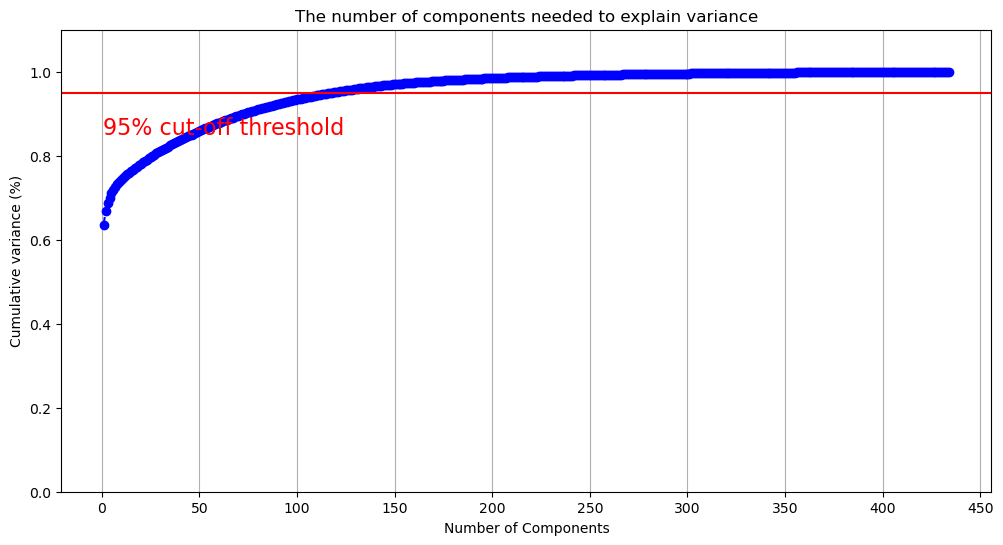

In [54]:
show_explained_variance(df_to_cluster)

In [55]:
def execute_pca(df, n_components=15):
    pca = PCA(n_components=n_components)
    pca.fit(df)

    explained_variance = pca.explained_variance_ratio_
    print("Sum of Explained Variance:", sum(explained_variance))
    
    pca_data = pca.transform(df)
    pca_columns = [f'PCA_{i + 1}' for i in range(n_components)]
    pca_df = pd.DataFrame(data=pca_data, columns=pca_columns)
    return pca_df

In [102]:
pca_df = execute_pca(df_to_cluster, 100)
pca_df

Sum of Explained Variance: 0.9332215395371548


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_91,PCA_92,PCA_93,PCA_94,PCA_95,PCA_96,PCA_97,PCA_98,PCA_99,PCA_100
0,2.480259,-0.436990,-0.046263,0.071793,-0.003679,-0.317449,0.224623,-0.065315,-0.125472,0.225335,...,0.086486,-0.027702,-0.034223,-0.063023,-0.012081,-0.096625,0.092284,-0.090853,-0.010783,0.057681
1,2.494138,0.371652,-0.653687,0.578314,0.232882,-0.072123,-0.118361,0.351713,0.464197,-0.344925,...,-0.010081,0.099637,0.117126,0.074585,-0.041001,0.178416,0.055832,-0.057869,0.108150,-0.052422
2,0.829450,-0.359468,0.378870,0.086275,-0.118807,0.104021,0.275332,-0.074827,-0.072128,0.057449,...,-0.017040,0.046664,-0.017913,0.037594,-0.117706,-0.036155,0.013794,-0.068554,0.033189,0.021475
3,1.811948,-1.721665,-0.829830,-0.016365,-0.131365,0.414141,0.082963,-0.460997,-0.195529,0.072521,...,-0.043805,-0.115690,0.070481,-0.083432,-0.198271,-0.039846,0.026009,0.026178,0.019266,-0.060228
4,-0.138873,-0.182221,-0.676287,-0.808485,-0.393638,0.026984,0.885312,-0.004200,-0.260923,0.340824,...,0.026328,-0.029068,0.038025,-0.043271,0.199984,0.074117,-0.014366,-0.054187,-0.025838,-0.148048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,-2.958870,-0.219463,0.097233,0.050088,0.148611,0.069912,0.160699,0.059239,0.008699,0.111299,...,-0.066403,-0.063364,-0.080275,-0.006032,-0.001662,0.025212,-0.020459,0.031441,0.067372,0.038159
1882,-1.544619,-0.026088,0.390534,-0.275331,-0.048331,0.000097,0.106273,-0.087311,0.113394,0.013713,...,0.006600,0.076157,-0.043719,-0.057515,-0.070126,0.054057,-0.078456,-0.021776,-0.074596,-0.007845
1883,-1.759032,0.034375,0.130001,-0.123086,-0.005086,-0.208847,-0.017158,0.039513,-0.034241,0.005071,...,0.002027,-0.054287,0.011478,0.009785,-0.043505,0.033443,-0.066163,-0.038914,0.029181,0.005010
1884,-3.805570,0.050895,-0.043957,0.101039,-0.045968,-0.096993,-0.080617,0.034189,0.096684,0.052837,...,-0.028781,0.025078,0.081215,0.036697,-0.042933,-0.077298,-0.037853,-0.003745,0.005343,0.019846


## Estimate number of clusters

In [197]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.model_selection import GridSearchCV
from fcmeans import FCM
from scipy.cluster.hierarchy import dendrogram, linkage

### Elbow method

In [104]:
def elbow_method(X, max_clusters, estimator, estimator_params={}):
    inertia = list()
    for i in range(2, max_clusters):
        clusterer = estimator(n_clusters = i, **estimator_params)
        clusterer.fit(X)
        inertia.append(clusterer.inertia_)

    plt.plot(range(2, max_clusters), inertia)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

### Silhouette analysis

In [105]:
def silhouette_analysis(X, max_clusters, estimator, estimator_params={}):
    range_n_clusters =  list(range(2, max_clusters + 1))
    scores = {}
    
    for n_clusters in range_n_clusters:
        clusterer = estimator(n_clusters=n_clusters, **estimator_params)
        if (estimator == FCM):
            clusterer.fit(X)
            cluster_labels = clusterer.predict(X)
        else:
            cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
#         print(f'For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}')
        scores[n_clusters] = silhouette_avg
        
    plt.plot(range_n_clusters, list(scores.values()), marker='o')
    plt.title('Silhouette analysis')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.show()
        
#         fig, ax1 = plt.subplots()
#         fig.set_size_inches(18, 7)

#         ax1.set_xlim([-0.1, 1])
#         ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
#         sample_silhouette_values = silhouette_samples(X, cluster_labels)

#         y_lower = 10
#         for i in range(n_clusters):
#             ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
#             ith_cluster_silhouette_values.sort()

#             size_cluster_i = ith_cluster_silhouette_values.shape[0]
#             y_upper = y_lower + size_cluster_i

#             color = cm.nipy_spectral(float(i) / n_clusters)
#             ax1.fill_betweenx(
#                 np.arange(y_lower, y_upper),
#                 0,
#                 ith_cluster_silhouette_values,
#                 facecolor=color,
#                 edgecolor=color,
#                 alpha=0.7
#             )

#             ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#             y_lower = y_upper + 10


#         ax1.set_title(f"The silhouette plot for {n_clusters} clusters.")
#         ax1.set_xlabel("The silhouette coefficient values")
#         ax1.set_ylabel("Cluster label")

#         ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#         ax1.set_yticks([])
#         ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    #     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #     ax2.scatter(
    #         X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    #     )

    #     centers = clusterer.cluster_centers_
    #     ax2.scatter(
    #         centers[:, 0],
    #         centers[:, 1],
    #         marker="o",
    #         c="white",
    #         alpha=1,
    #         s=200,
    #         edgecolor="k",
    #     )

    #     for i, c in enumerate(centers):
    #         ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    #     ax2.set_title("The visualization of the clustered data.")
    #     ax2.set_xlabel("Feature space for the 1st feature")
    #     ax2.set_ylabel("Feature space for the 2nd feature")

    #     plt.suptitle(
    #         "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    #         % n_clusters,
    #         fontsize=14,
    #         fontweight="bold",
    #     )


#     plt.show()
#     return best_score_clusters, best_score
    return scores

def cv_silhouette_scorer(estimator, X):
    estimator.fit(X)
    cluster_labels = estimator.labels_
    num_labels = len(set(cluster_labels))
    num_samples = len(X.index)
    if num_labels == 1 or num_labels == num_samples:
        return -1
    else:
        return silhouette_score(X, cluster_labels)

### Davies Bouldin analysis

In [106]:
def davies_bouldin_analysis(X, max_clusters, estimator, estimator_params={}):
    range_n_clusters =  list(range(2, max_clusters + 1))
    scores = {}
    
    for n_clusters in range_n_clusters:
        clusterer = estimator(n_clusters=n_clusters, **estimator_params)
        if (estimator == FCM):
            estimator.fit(X)
            cluster_labels = clusterer.predict(X)
        else:
            cluster_labels = clusterer.fit_predict(X)
            
        db_score = davies_bouldin_score(X, cluster_labels)
        scores[n_clusters] = db_score

    plt.plot(range_n_clusters, list(scores.values()), marker='o')
    plt.title('Davies-Bouldin Index')
    plt.xlabel('Number of clusters')
    plt.ylabel('Davies-Bouldin score')
    plt.show()

    return scores

### Estimates

=== ORIGINAL DF ===


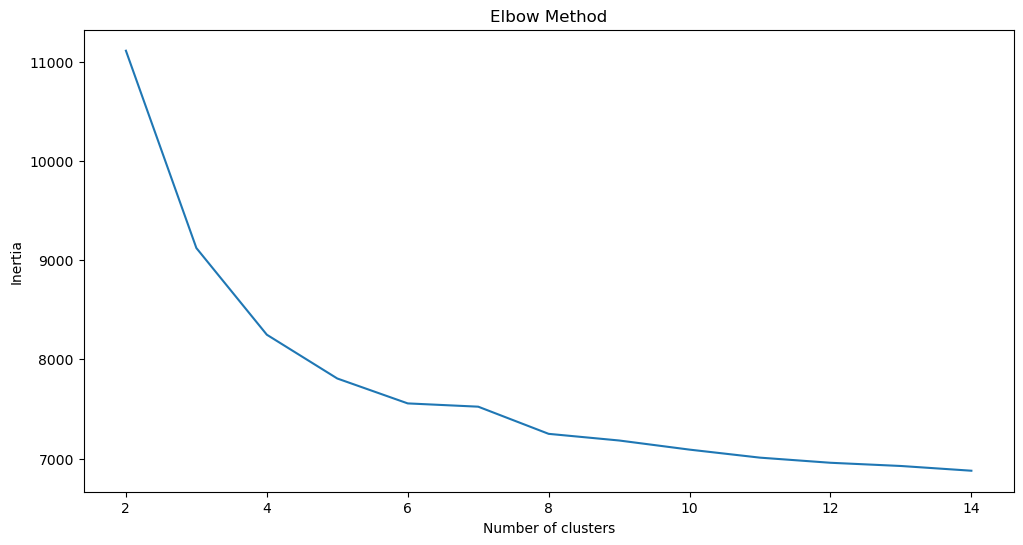

=== PCA DF ===


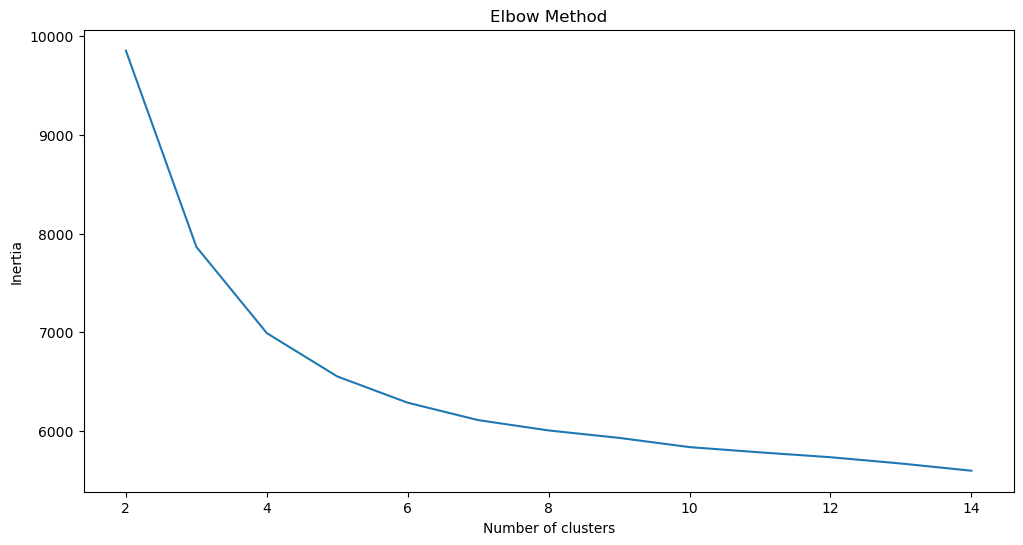

In [107]:
print("=== ORIGINAL DF ===")
params = {
    'n_init': 'auto',
    'random_state': 23,
}
elbow_method(df_to_cluster, 15, KMeans, params)

print("=== PCA DF ===")
elbow_method(pca_df, 15, KMeans, params)

=== ORIGINAL DF ===


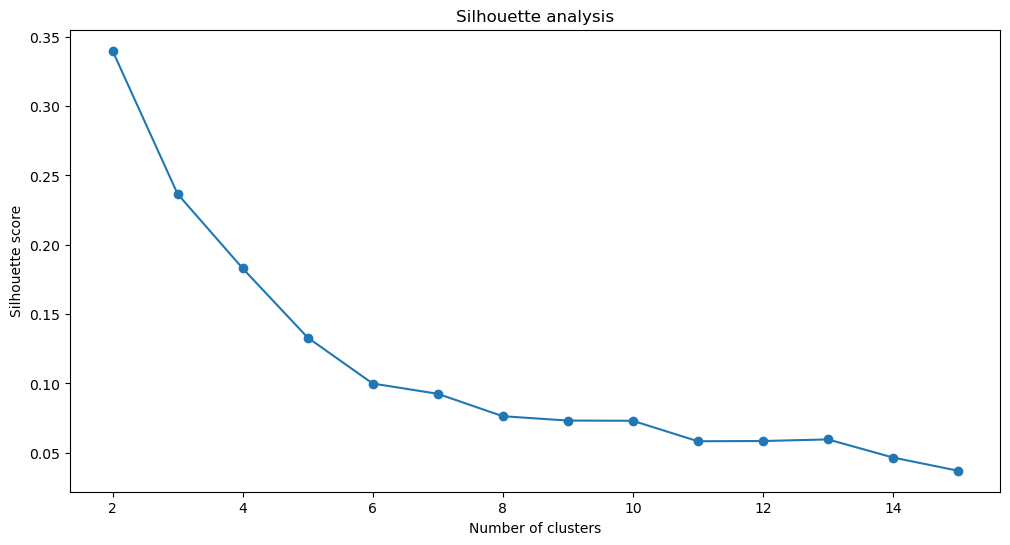

=== PCA DF === 


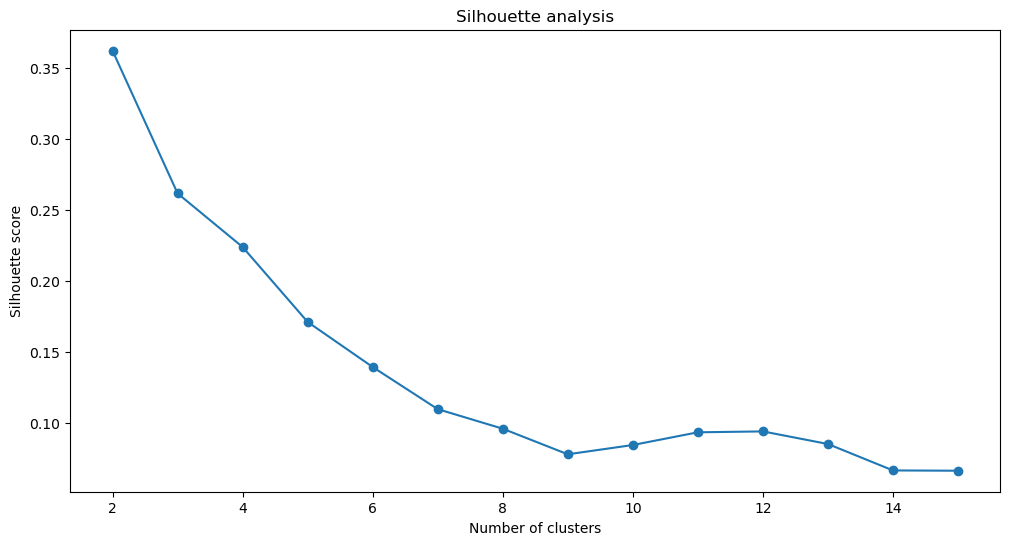

In [115]:
params = {
    'n_init': 'auto',
    'random_state': 23,
}
print("=== ORIGINAL DF ===")
scores = silhouette_analysis(df_to_cluster, 15, KMeans, params)
print("=== PCA DF === ")
scores = silhouette_analysis(pca_df, 15, KMeans, params)

sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
top_sil_n_clusters = [num_clusters for num_clusters, _ in sorted_scores[:3]]

=== ORIGINAL DF ===


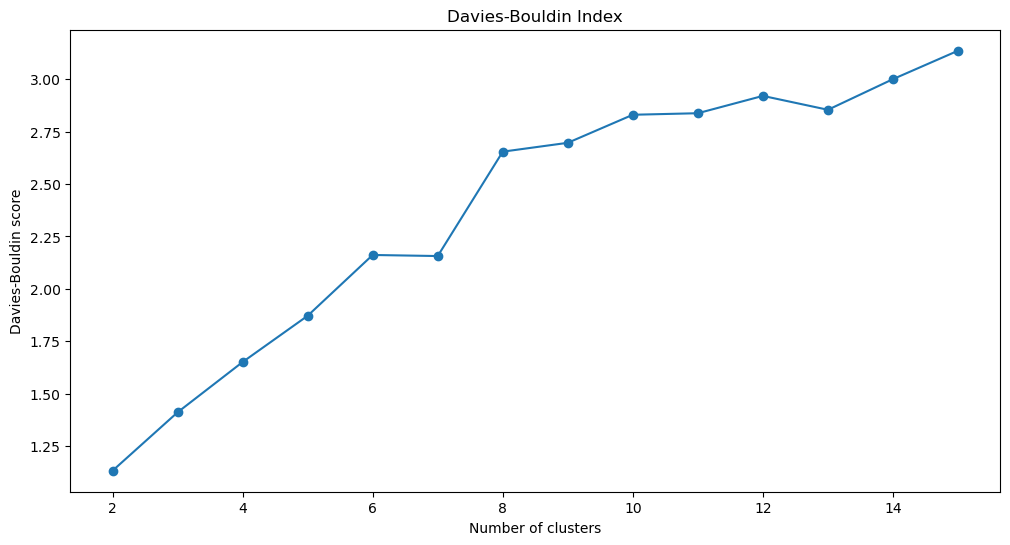

=== PCA DF === 


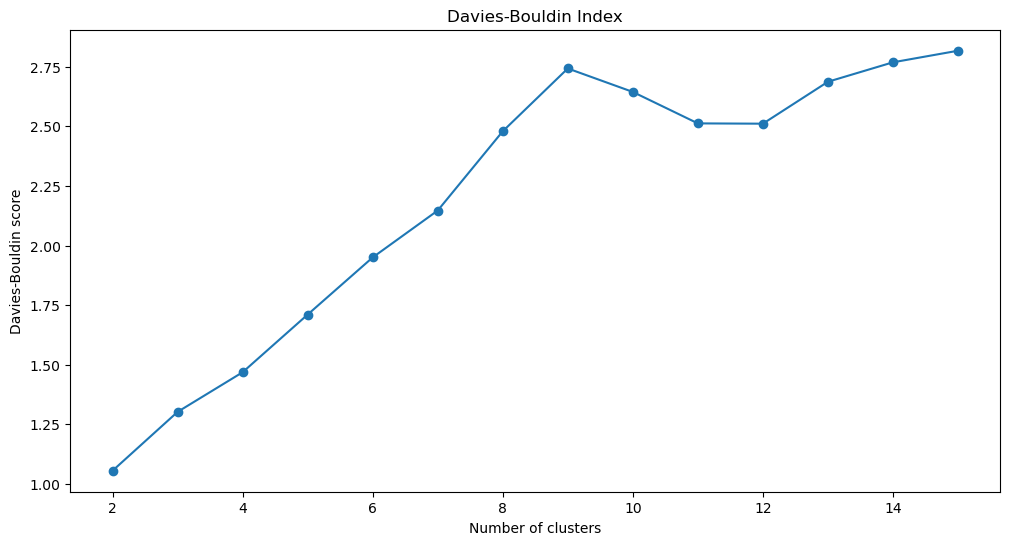

In [116]:
print("=== ORIGINAL DF ===")
scores = davies_bouldin_analysis(df_to_cluster, 15, KMeans, params)
print("=== PCA DF === ")
scores = davies_bouldin_analysis(pca_df, 15, KMeans, params)

db_sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=False)
top_db_n_clusters = [num_clusters for num_clusters, _ in sorted_scores[:3]]

In [292]:
print("SIL")
for n, score in sorted_scores[:5]:
    print(f"{n}: {score}")

print("DB")
for n, score in db_sorted_scores[:5]:
    print(f"{n}: {score}")
    
chosen_n_clusters = list(set(top_sil_n_clusters) & set(top_db_n_clusters))

if NUMBER_UNIQUE_LABELS is not None:
    chosen_n_clusters.append(NUMBER_UNIQUE_LABELS)

print()
print(f"Chosen n clusters: {chosen_n_clusters}")

SIL
2: 0.3689939141856989
3: 0.2183471568097328
4: 0.1960492793781439
5: 0.13068601713956932
6: 0.130311264879095
DB
2: 1.0550284125854945
3: 1.3019302080794086
4: 1.4682453589076108
5: 1.710281493474552
6: 1.950111127540463

Chosen n clusters: [2, 3, 4, 9]


### DBSCAN

In [293]:
param_grid = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'eps': [0.2, 0.5, 1, 2, 3, 5, 10],
    'leaf_size': [10, 30, 50],
    'min_samples': [5, 10]
}

In [294]:
dbscan = DBSCAN()

grid_search = GridSearchCV(
    estimator=dbscan, 
    param_grid=param_grid, 
    cv=[(slice(None), slice(None))],
    scoring=cv_silhouette_scorer,
    n_jobs=-1
).fit(pca_df)

best_params = grid_search.best_params_
print("Best parameters found:", best_params)
print("Best score:", grid_search.best_score_)

Best parameters found: {'algorithm': 'auto', 'eps': 3, 'leaf_size': 10, 'min_samples': 5}
Best score: 0.386936162332552


In [295]:
dbscan = DBSCAN(
    eps=1.0,
    min_samples=best_params['min_samples'],
    algorithm=best_params['algorithm'],
    leaf_size=best_params['leaf_size']
).fit(pca_df)

labels = dbscan.labels_
print(f"n_clusters: {len(set(labels))}")

n_clusters: 2


In [296]:
def visualise_clusters(labels, alg_name):
    pca_to_visualise_df = pca_df[["PCA_1", "PCA_2"]]
    
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels) + 1)]

    for k, col in zip(unique_labels, colors):
        if k == -1:
    #         Black used for noise points
    #         col = [0, 0, 0, 1]
            continue

        class_member_mask = (labels == k)

        xy = pca_to_visualise_df[class_member_mask]
        plt.plot(
            xy['PCA_1'], 
            xy['PCA_2'], 
            'o', 
            markerfacecolor=tuple(col),
            markeredgecolor='k', 
            markersize=10,
            label=f'Cluster {k}'
        )

    plt.title(f'{alg_name} Clustering')
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

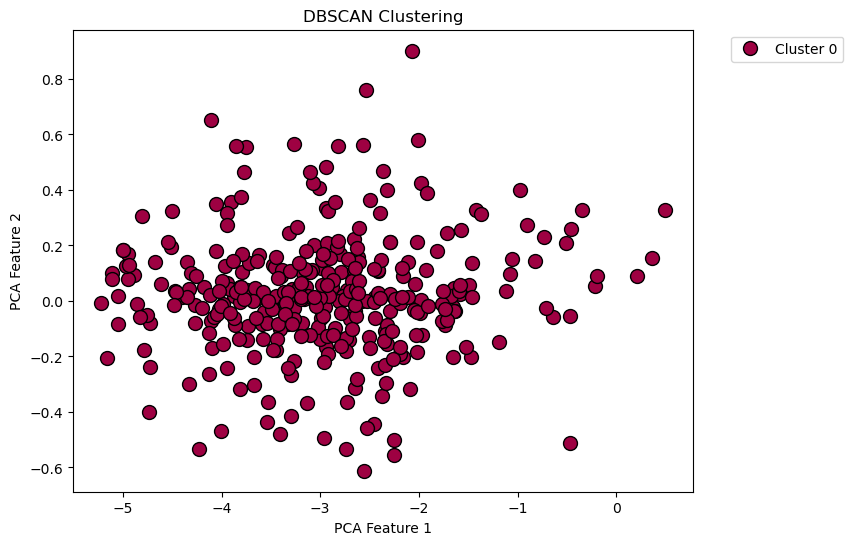

In [297]:
visualise_clusters(labels, 'DBSCAN')

## KMeans

In [298]:
def perform_grid_search(estimator, param_grid, estimator_params={}):
    grid_search_scores = {}
    
    for n_clusters in chosen_n_clusters:
        print(f"PERFORMING PARAM GRID FOR {n_clusters} CLUSTERS")

        clusterer = estimator(**estimator_params, n_clusters=n_clusters)

        grid_search = GridSearchCV(
            estimator=clusterer, 
            param_grid=param_grid, 
            cv=[(slice(None), slice(None))],
            scoring=cv_silhouette_scorer,
            n_jobs=-1
        )
        grid_search.fit(pca_df)

        grid_search_scores[n_clusters] = {
            "best_params": grid_search.best_params_,
            "best_score": grid_search.best_score_
        }
    
    return grid_search_scores

In [299]:
params = {
    'n_init': 'auto',
    'random_state': 23,
}

param_grid = {
    'init': ['k-means++', 'random'],
    'max_iter': [10, 15, 25, 50, 100, 200],
    'tol': [1e-2, 1e-3, 1e-4, 1e-5]
}

grid_search_scores = perform_grid_search(KMeans, param_grid, params)

PERFORMING PARAM GRID FOR 2 CLUSTERS
PERFORMING PARAM GRID FOR 3 CLUSTERS
PERFORMING PARAM GRID FOR 4 CLUSTERS
PERFORMING PARAM GRID FOR 9 CLUSTERS


In [300]:
kmeans_labels = {}
for n in grid_search_scores:
    grid_search = grid_search_scores[n]
    print(f"n_clusters: {n} - {grid_search}")
    
    kmeans = KMeans(
        random_state=23, 
        n_init='auto',
        n_clusters=n,
        init=grid_search['best_params']['init'],
        max_iter=grid_search['best_params']['max_iter'],
        tol=grid_search['best_params']['tol']
    ).fit(pca_df)

    kmeans_labels[n] = kmeans.labels_
    print(kmeans_labels[n])

n_clusters: 2 - {'best_params': {'init': 'random', 'max_iter': 10, 'tol': 0.01}, 'best_score': 0.36288778394768706}
[0 0 0 ... 1 1 0]
n_clusters: 3 - {'best_params': {'init': 'k-means++', 'max_iter': 10, 'tol': 0.01}, 'best_score': 0.2684581074354944}
[2 2 0 ... 1 1 0]
n_clusters: 4 - {'best_params': {'init': 'k-means++', 'max_iter': 10, 'tol': 0.01}, 'best_score': 0.22465700762832155}
[3 3 0 ... 1 1 3]
n_clusters: 9 - {'best_params': {'init': 'k-means++', 'max_iter': 10, 'tol': 0.01}, 'best_score': 0.09726350064212236}
[7 4 8 ... 3 1 8]


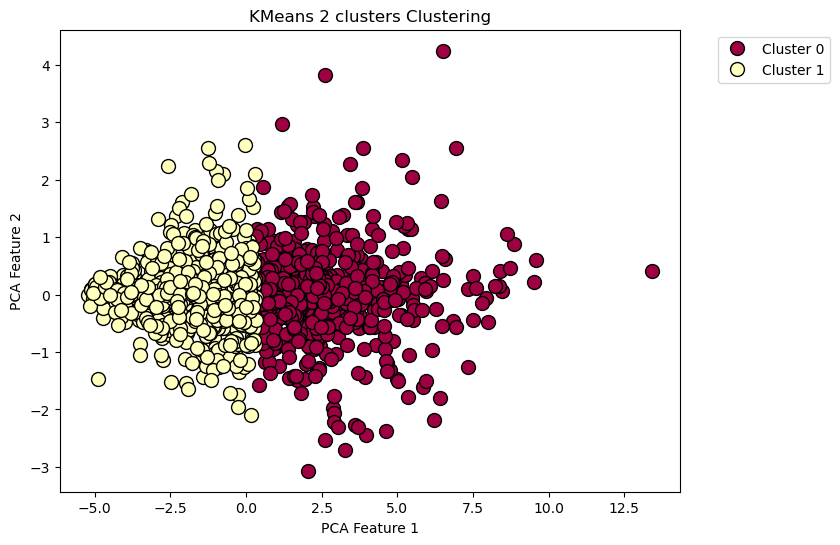

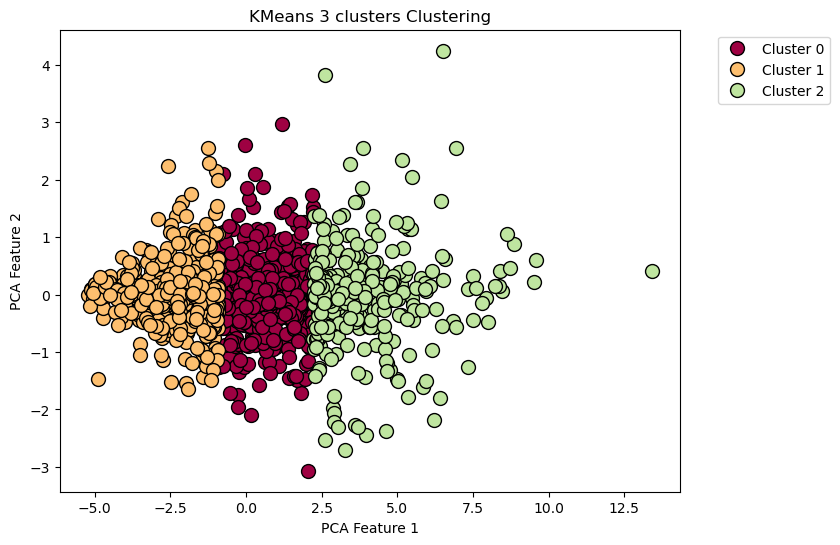

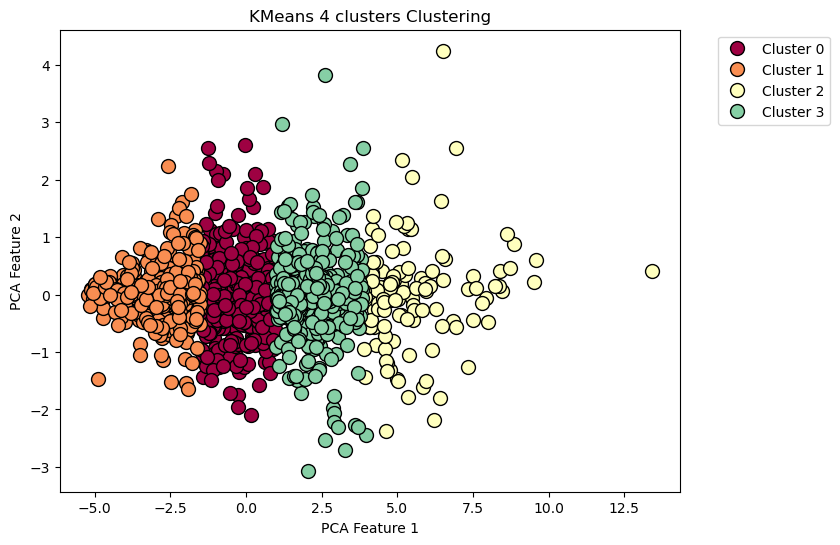

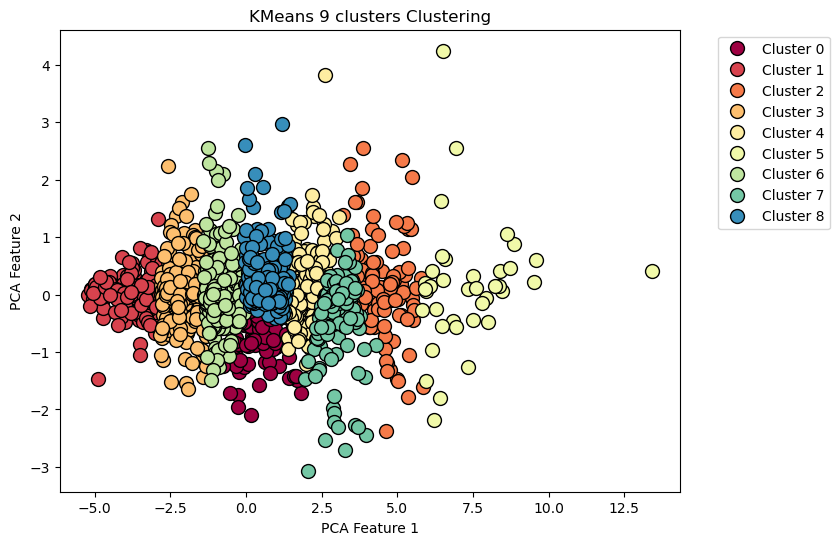

In [301]:
for n in kmeans_labels:
    visualise_clusters(kmeans_labels[n], f'KMeans {n} clusters')

### Agglomerative Clustering

In [302]:
param_grid = {
    'linkage': ['ward', 'complete', 'average', 'single']
}

grid_search_scores = perform_grid_search(AgglomerativeClustering, param_grid)

PERFORMING PARAM GRID FOR 2 CLUSTERS
PERFORMING PARAM GRID FOR 3 CLUSTERS
PERFORMING PARAM GRID FOR 4 CLUSTERS
PERFORMING PARAM GRID FOR 9 CLUSTERS


In [303]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                # Leaf node
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [304]:
agglo_labels = {}
for n in grid_search_scores:
    grid_search = grid_search_scores[n]
    print(f"n_clusters: {n} - {grid_search}")
    
    agglo = AgglomerativeClustering(
        n_clusters=n,
        compute_distances=True,
        linkage=grid_search['best_params']['linkage']
    ).fit(pca_df)

    agglo_labels[n] = agglo.labels_
    print(agglo_labels[n])
    
#     plt.title('Hierarchical Clustering Dendrogram')
#     # Plot the top three levels of the dendrogram
#     plot_dendrogram(agglo, truncate_mode='level', p=3)
#     plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#     plt.show()

n_clusters: 2 - {'best_params': {'linkage': 'average'}, 'best_score': 0.6920759281960825}
[0 0 0 ... 0 0 0]
n_clusters: 3 - {'best_params': {'linkage': 'average'}, 'best_score': 0.4616049344418304}
[2 2 2 ... 2 2 2]
n_clusters: 4 - {'best_params': {'linkage': 'average'}, 'best_score': 0.4057262709362661}
[0 0 0 ... 0 0 0]
n_clusters: 9 - {'best_params': {'linkage': 'average'}, 'best_score': 0.31649583852428037}
[1 1 1 ... 1 1 1]


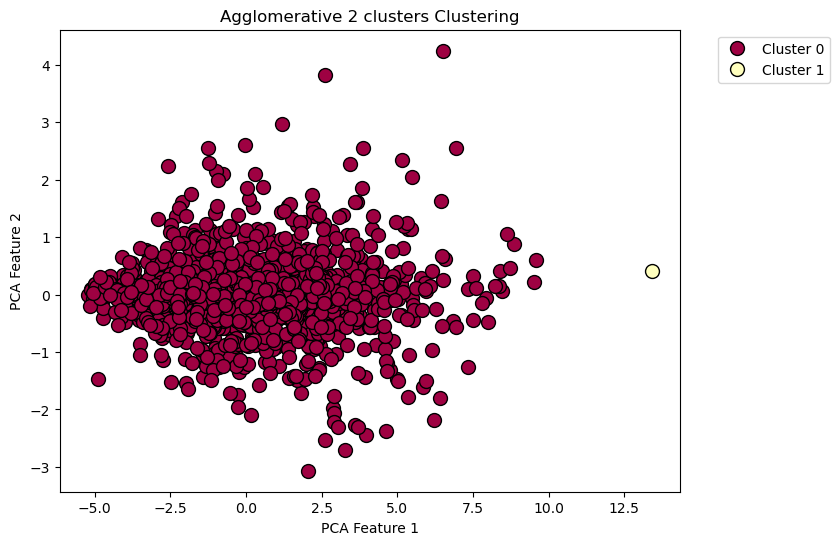

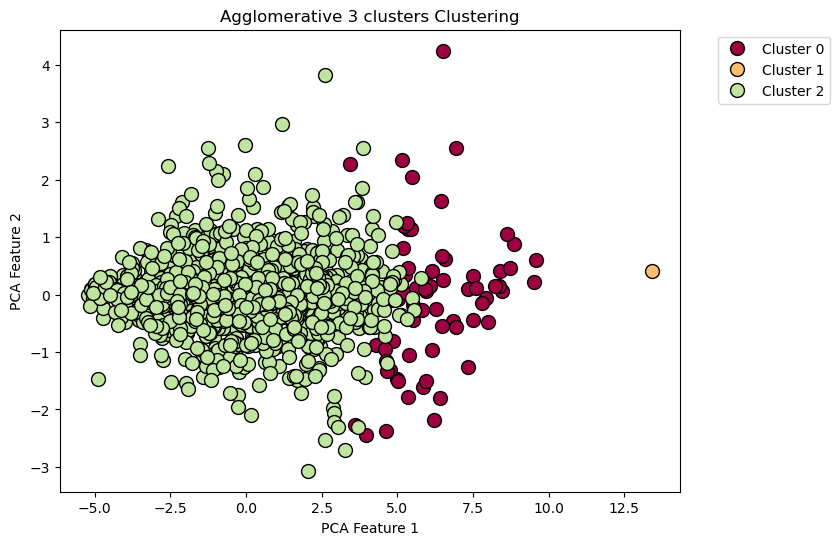

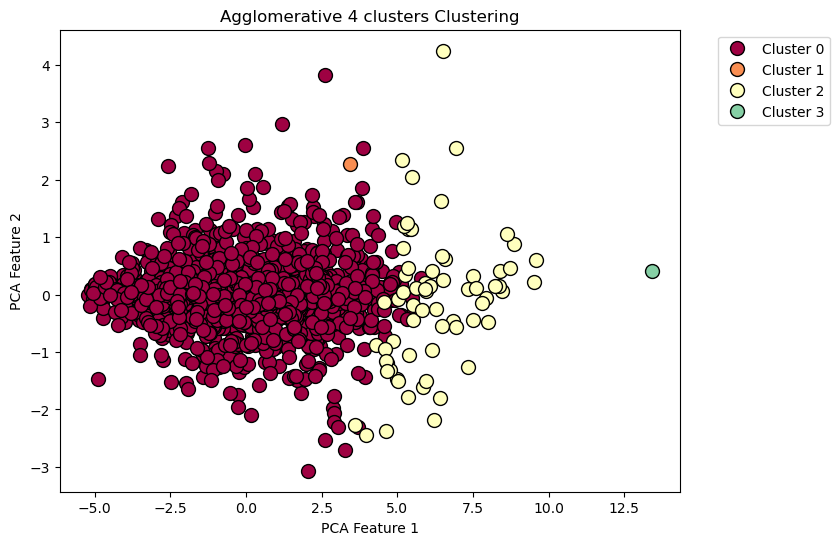

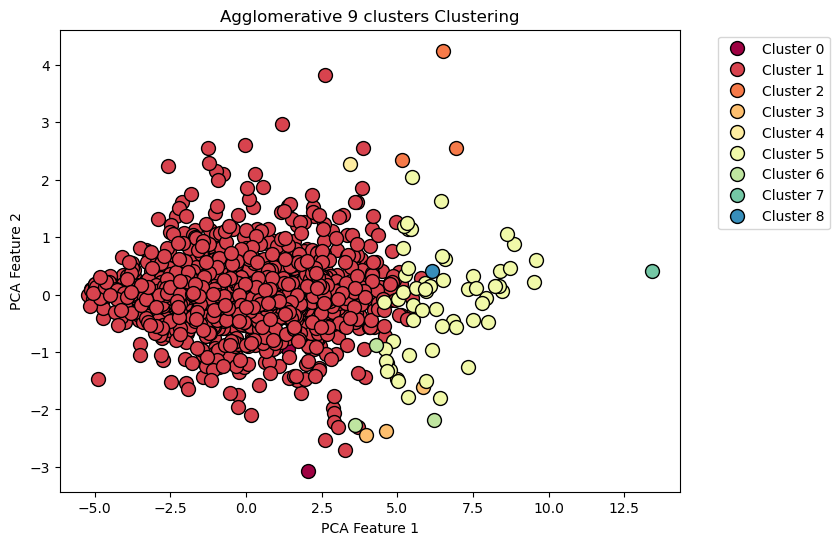

In [305]:
for n in agglo_labels:
    visualise_clusters(agglo_labels[n], f'Agglomerative {n} clusters')

### Fuzzy c-means

In [306]:
def fcm_grid_search(param_grid, n_clusters, estimator_params={}):
    best_params = None
    best_score = -np.inf
#     best_labels = None
#     best_centers = None
    
    print(f"PERFORMING PARAM GRID FOR {n_clusters} CLUSTERS")
    
    # Iterate over all parameter combinations
    for max_iter in param_grid['max_iter']:
        for m in param_grid['m']:
            for error in param_grid['error']:
                try:
                    # Perform FCM clustering
                    fcm = FCM(n_clusters=n_clusters, max_iter=max_iter, m=m, error=error, **estimator_params)
                    fcm.fit(pca_df.values)
                    cluster_labels = fcm.predict(pca_df.values)
                    cluster_centers = fcm.centers

                    # Evaluate clustering performance using silhouette score
                    silhouette_avg = silhouette_score(pca_df, cluster_labels)
#                     print(f"max_iter: {max_iter}, m: {m}, error: {error}, silhouette_score: {silhouette_avg}")

                    if silhouette_avg > best_score:
                        best_score = silhouette_avg
                        best_params = {'max_iter': max_iter, 'm': m, 'error': error}
#                         best_labels = cluster_labels
#                         best_centers = cluster_centers
                    
                except (ZeroDivisionError, ValueError, FloatingPointError) as e:
                    print(f"Skipping parameters max_iter: {max_iter}, m: {m}, error: {error} due to error: {e}")

    grid_search_results = {"best_params": best_params, "best_score": best_score}
    return grid_search_results

In [307]:
param_grid = {
    'max_iter': [50, 100, 150],
    'm': [1.1, 1.25, 1.5, 2],
    'error': [1e-2, 1e-3, 1e-4, 1e-5]
}

grid_search_scores = {}

for n_clusters in chosen_n_clusters:
    grid_search_scores[n_clusters] = fcm_grid_search(param_grid, n_clusters, estimator_params={'random_state': 23})

PERFORMING PARAM GRID FOR 2 CLUSTERS
PERFORMING PARAM GRID FOR 3 CLUSTERS
PERFORMING PARAM GRID FOR 4 CLUSTERS
PERFORMING PARAM GRID FOR 9 CLUSTERS


In [308]:
cmeans_labels = {}
for n in grid_search_scores:
    grid_search = grid_search_scores[n]
    print(f"n_clusters: {n} - {grid_search}")
    
    cmeans = FCM(
        random_state=23, 
        n_clusters=n,
        max_iter=grid_search['best_params']['max_iter'],
        m=grid_search['best_params']['m'],
        error=grid_search['best_params']['error']
    )
    cmeans.fit(pca_df.values)
               
    print(f"PC: {cmeans.partition_coefficient}")
    print(f"PEC: {cmeans.partition_entropy_coefficient}")

#     pc = model.partition_coefficient
#     pec = model.partition_entropy_coefficient
               
    cmeans_labels[n] = cmeans.predict(pca_df.values)
    print(cmeans_labels[n])

n_clusters: 2 - {'best_params': {'max_iter': 50, 'm': 1.25, 'error': 0.001}, 'best_score': 0.36301330240803487}
PC: 0.46626625228214513
PEC: 0.0815861421649204
[1 1 1 ... 0 0 1]
n_clusters: 3 - {'best_params': {'max_iter': 50, 'm': 1.25, 'error': 0.01}, 'best_score': 0.2640896330112755}
PC: 0.29311688153481064
PEC: 0.09797771384342291
[0 0 2 ... 1 1 2]
n_clusters: 4 - {'best_params': {'max_iter': 50, 'm': 1.1, 'error': 0.01}, 'best_score': 0.2125822314524685}
PC: 0.233978271608192
PEC: 0.037910008536120594
[0 0 0 ... 1 1 0]
n_clusters: 9 - {'best_params': {'max_iter': 100, 'm': 1.25, 'error': 0.001}, 'best_score': 0.08295675893298918}
PC: 0.06171737633417931
PEC: 0.1335265748790829
[6 6 1 ... 2 7 1]


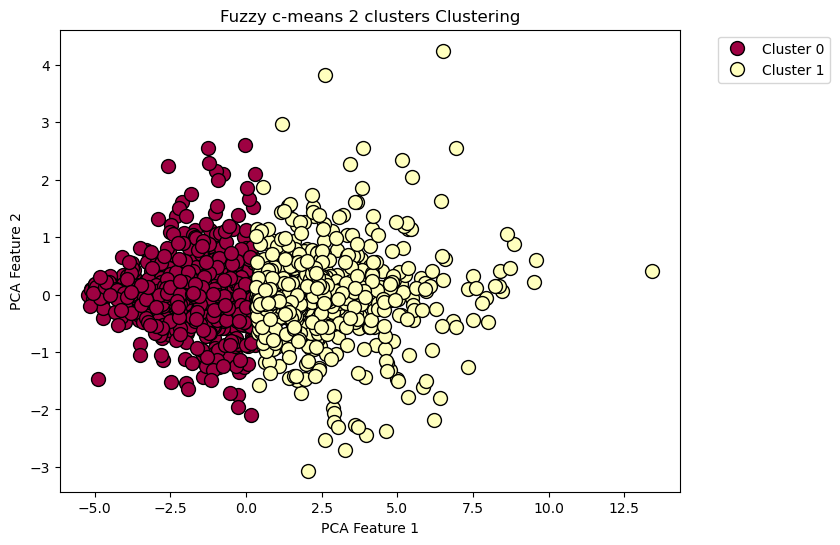

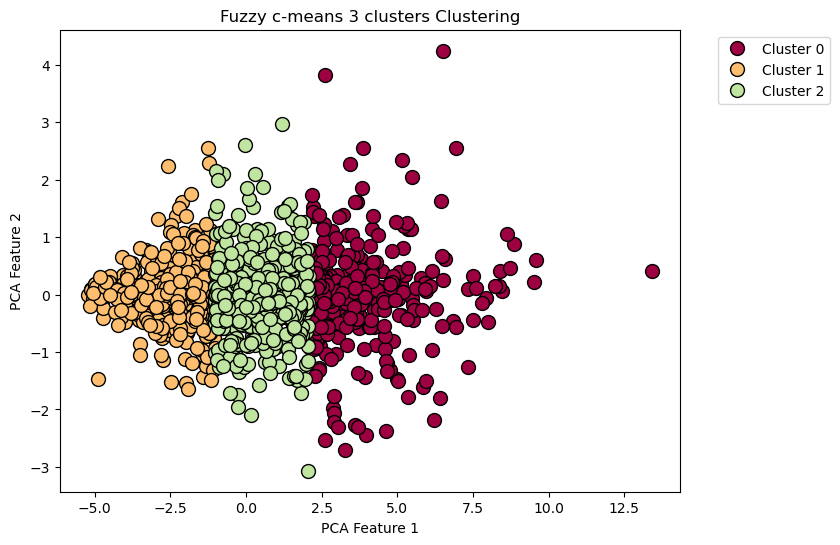

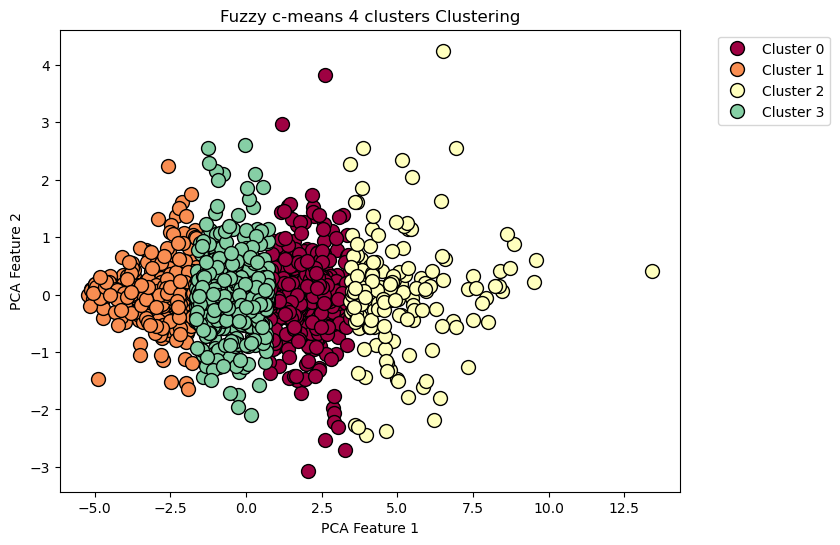

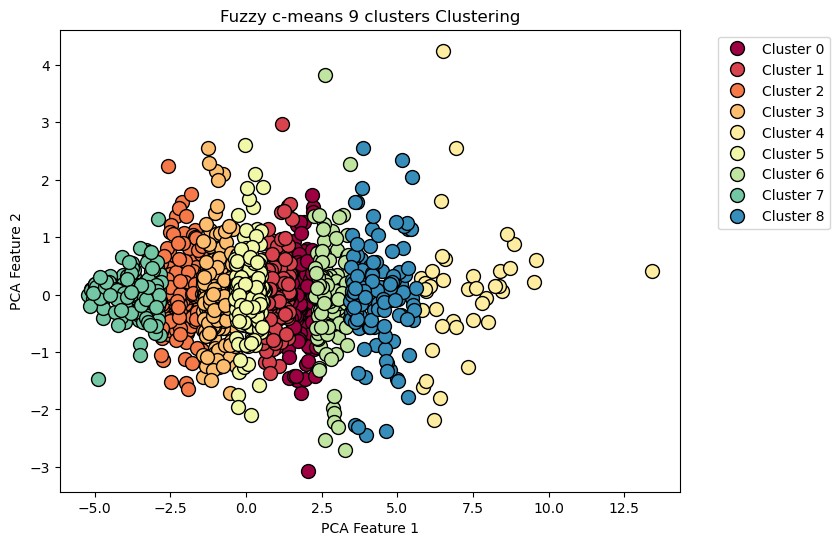

In [309]:
for n in cmeans_labels:
    visualise_clusters(cmeans_labels[n], f'Fuzzy c-means {n} clusters')

In [268]:
# # pca_to_visualise_df = execute_pca(pca_df, 2)
# pca_to_visualise_df = pca_df[["PCA_1", "PCA_2"]]

In [267]:
# num_clusters = len(param_grid['n_clusters'])
# rows = int(np.ceil(np.sqrt(num_clusters)))
# cols = int(np.ceil(num_clusters / rows))

# fig, ax = plt.subplots(rows, cols, figsize=(11, 16))

# for n_clusters, model, axe in zip(param_grid['n_clusters'], models, ax.ravel()):
#     # get validation metrics
#     pc = model.partition_coefficient
#     pec = model.partition_entropy_coefficient
    
#     fcm_centers = model.centers
#     fcm_labels = model.predict(pca_df.values)
    
#     # plot result
#     axe.scatter(pca_to_visualise_df.values[:, 0], pca_to_visualise_df.values[:, 1], c=fcm_labels, alpha=0.4)
#     axe.scatter(fcm_centers[:, 0], fcm_centers[:, 1], marker="+", s=500, c='black')
#     axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}, PEC = {pec:.3f}')
    
# plt.show()